# Import

In [35]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [38]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [39]:
train = pd.read_csv("./Data/merged.csv", parse_dates=['AOBT','ATOT'], date_parser=dateparse)

In [40]:
train.shape

(543813, 33)

In [41]:
train

,Aircraft_Model,AOBT,ATOT,Stand,Runway,hour,minute,year,month,day,...,pressure,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,precipType,precipAccumulation,ozone
0,B737-800 WINGLETS,2015-01-01 05:56:00,2015-01-01 06:05:00,STAND_62,RUNWAY_4,6,0,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
1,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:18:00,STAND_153,RUNWAY_4,6,10,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
2,A320-100/200,2015-01-01 06:08:00,2015-01-01 06:19:00,STAND_44,RUNWAY_2,6,15,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
3,A320-100/200,2015-01-01 06:24:00,2015-01-01 06:36:00,STAND_7,RUNWAY_3,6,20,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
4,A319,2015-01-01 06:14:00,2015-01-01 06:27:00,STAND_17,RUNWAY_2,6,20,2015,1,1,...,1031.6,10.29,11.39,210.0,0.75,0.0,5.859,None,0.0,310.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543808,A350-900,2018-12-31 21:02:00,2018-12-31 21:20:00,STAND_150,RUNWAY_3,21,15,2018,12,31,...,1017.3,7.62,27.73,262.0,1.00,0.0,6.216,None,0.0,310.4
543809,B787-900,2018-12-31 21:24:00,2018-12-31 21:38:00,STAND_77,RUNWAY_1,21,30,2018,12,31,...,1017.3,9.18,27.73,281.0,1.00,0.0,6.216,None,0.0,310.4
543810,A330-200,2018-12-31 22:27:00,2018-12-31 22:37:00,STAND_120,RUNWAY_1,21,50,2018,12,31,...,1017.3,9.18,27.73,281.0,1.00,0.0,6.216,None,0.0,310.4
543811,B787-800 Dreamliner,2018-12-31 22:09:00,2018-12-31 22:29:00,STAND_49,RUNWAY_2,22,10,2018,12,31,...,1017.3,9.18,27.73,281.0,1.00,0.0,6.216,None,0.0,310.4


# EDA
## Distribution of targets

In [42]:
train['taxi_seconds'].describe()

count    543813.000000
mean       1125.287112
std         490.325000
min      -13080.000000
25%         840.000000
50%        1080.000000
75%        1320.000000
max       39360.000000
Name: taxi_seconds, dtype: float64

In [44]:
datetime_targets= train[["AOBT", "taxi_seconds"]]

In [46]:
datetime_targets.set_index("AOBT", inplace=True)

In [47]:
datetime_targets[(datetime_targets.taxi_seconds < 0 )] # weird numbers to be removed

,taxi_seconds
AOBT,
2017-09-06 00:25:00,-480.0
2018-06-17 09:05:00,-13080.0


In [48]:
cut_bins = [0, 500, 1000, 1500, 2000, 5000, 10000, 39360]
datetime_targets['taxi_seconds']= pd.cut(datetime_targets['taxi_seconds'], bins=cut_bins)
datetime_targets['taxi_seconds'].value_counts(sort=False)

<ipython-input-48-30a38c69cae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_targets['taxi_seconds']= pd.cut(datetime_targets['taxi_seconds'], bins=cut_bins)


(0, 500]           12788
(500, 1000]       217575
(1000, 1500]      244868
(1500, 2000]       50864
(2000, 5000]       16812
(5000, 10000]        703
(10000, 39360]        33
Name: taxi_seconds, dtype: int64

<AxesSubplot:>

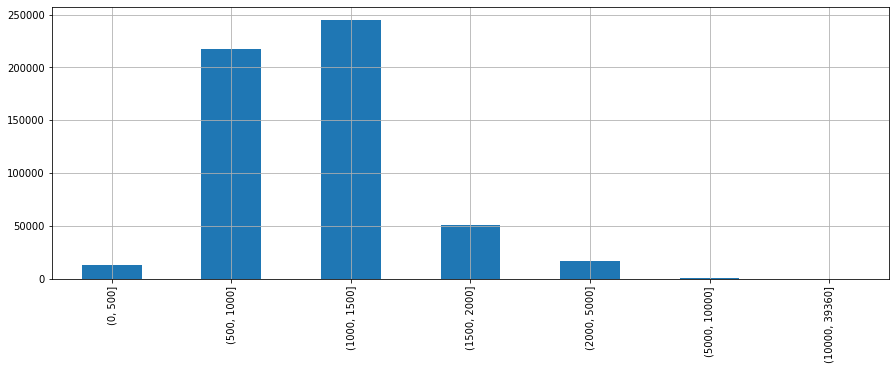

In [49]:
datetime_targets.taxi_seconds.value_counts(sort=False).plot(kind="bar", figsize=(15, 5), grid=True)

## Analyse the targets over time

In [50]:
dummy_targets = pd.get_dummies(datetime_targets["taxi_seconds"])

In [51]:
dummy_targets

,"(0, 500]","(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 5000]","(5000, 10000]","(10000, 39360]"
AOBT,,,,,,,
2015-01-01 05:56:00,0,1,0,0,0,0,0
2015-01-01 06:08:00,0,1,0,0,0,0,0
2015-01-01 06:08:00,0,1,0,0,0,0,0
2015-01-01 06:24:00,0,1,0,0,0,0,0
2015-01-01 06:14:00,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
2018-12-31 21:02:00,0,0,1,0,0,0,0
2018-12-31 21:24:00,0,1,0,0,0,0,0
2018-12-31 22:27:00,0,1,0,0,0,0,0


<AxesSubplot:xlabel='AOBT'>

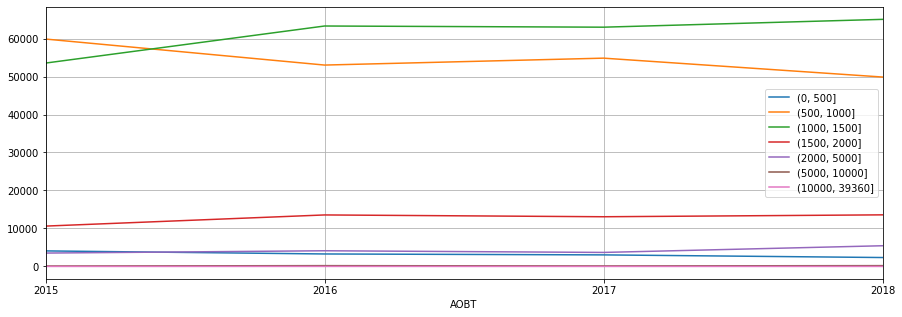

In [52]:
dummy_targets.resample("y").agg("sum").plot(figsize=(15, 5), grid=True)

<AxesSubplot:xlabel='AOBT'>

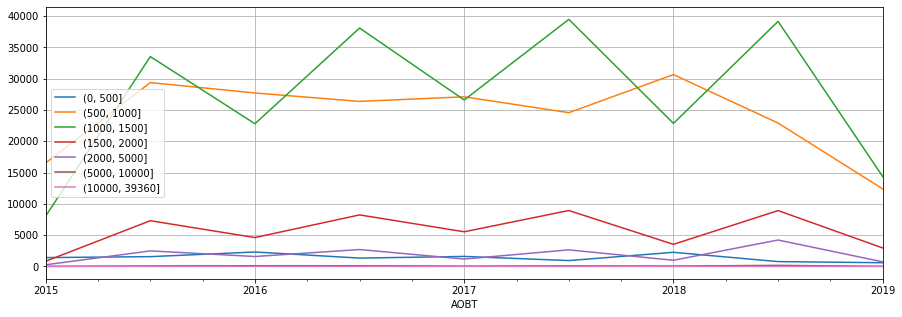

In [53]:
dummy_targets.resample("2Q").agg("sum").plot(figsize=(15, 5), grid=True)


<AxesSubplot:xlabel='AOBT'>

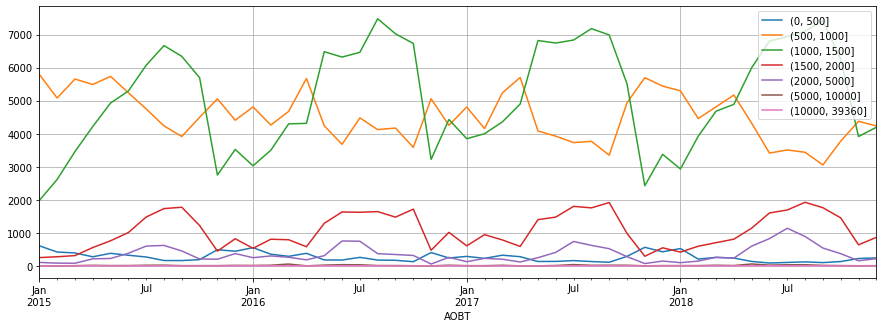

In [54]:
dummy_targets.resample("m").agg("sum").plot(figsize=(15, 5), grid=True)

<AxesSubplot:xlabel='AOBT'>

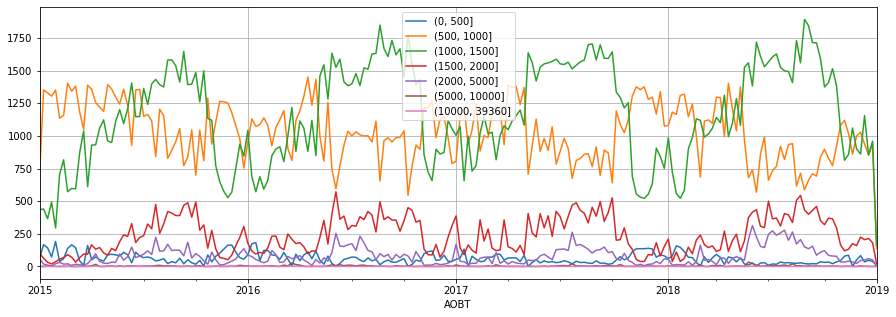

In [55]:
dummy_targets.resample("w").agg("sum").plot(figsize=(15, 5), grid=True)